In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('data.csv')
df.head()

Matplotlib is building the font cache; this may take a moment.


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


<ipython-input-2-097103c11754>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(personalities)) # Get a colormap


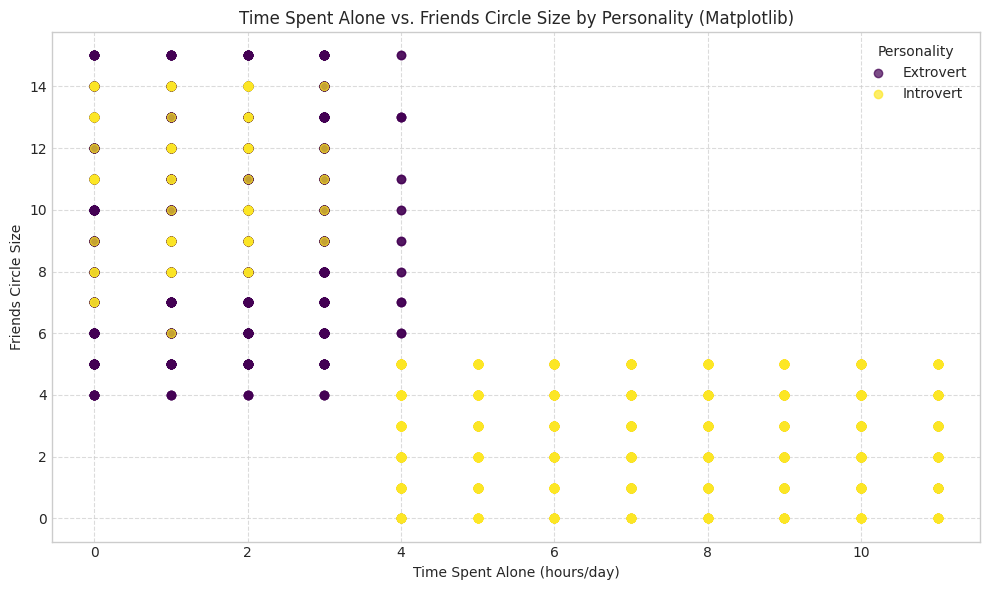

Scatter plot 'scatter_time_alone_vs_friends_mpl.png' saved.


In [2]:
plt.style.use('seaborn-v0_8-whitegrid')

plt.figure(figsize=(10, 6))
scatter_df1 = df[['Time_spent_Alone', 'Friends_circle_size', 'Personality']].dropna()
if not scatter_df1.empty:
    personalities = scatter_df1['Personality'].unique()
    colors = plt.cm.get_cmap('viridis', len(personalities)) # Get a colormap

    for i, p_type in enumerate(personalities):
        subset = scatter_df1[scatter_df1['Personality'] == p_type]
        plt.scatter(subset['Time_spent_Alone'], subset['Friends_circle_size'],
                    color=colors(i), label=p_type, alpha=0.7)
    
    plt.title('Time Spent Alone vs. Friends Circle Size by Personality (Matplotlib)')
    plt.xlabel('Time Spent Alone (hours/day)')
    plt.ylabel('Friends Circle Size')
    plt.legend(title='Personality')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig('scatter_time_alone_vs_friends_mpl.png')
    plt.show()
    print("Scatter plot 'scatter_time_alone_vs_friends_mpl.png' saved.")
else:
    print("Not enough data for 'Time Spent Alone vs. Friends Circle Size' plot after handling NaNs.")

<ipython-input-3-6fb3d4c22e10>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('plasma', len(personalities))


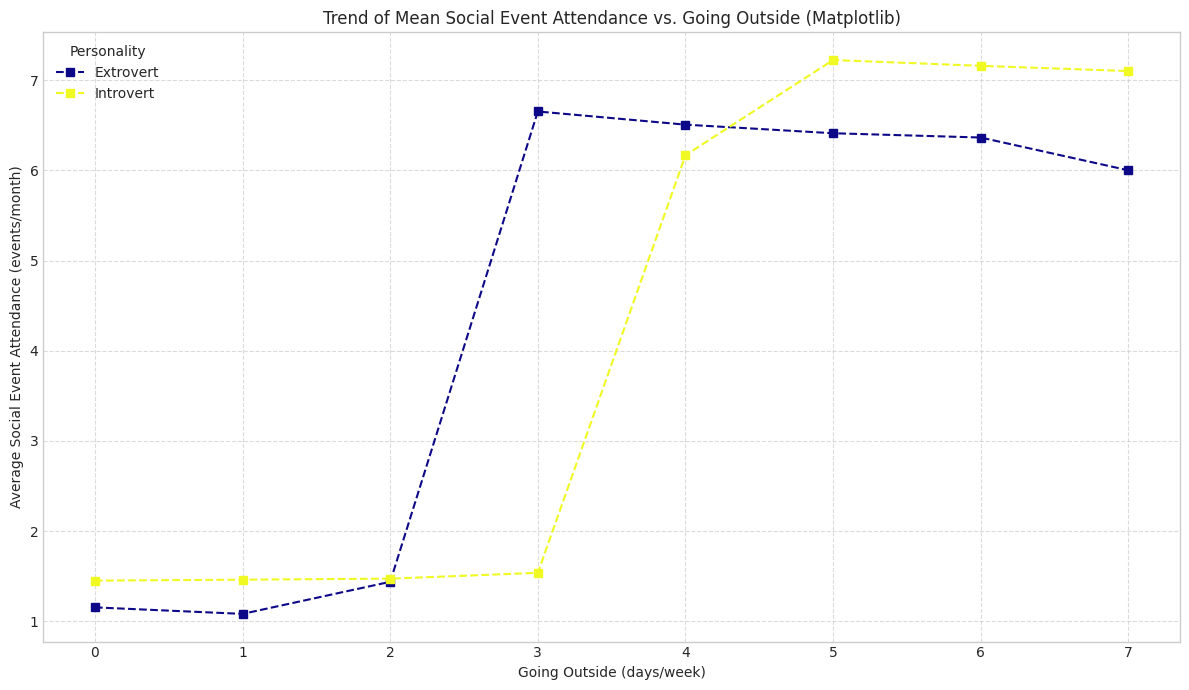

Line plot 'line_social_attendance_vs_going_outside_mpl.png' saved.


In [3]:
plt.figure(figsize=(12, 7))
line_df2 = df[['Going_outside', 'Social_event_attendance', 'Personality']].dropna()
if not line_df2.empty:
    personalities = line_df2['Personality'].unique()
    colors = plt.cm.get_cmap('plasma', len(personalities))

    for i, p_type in enumerate(personalities):
        subset = line_df2[line_df2['Personality'] == p_type]
        agg_data = subset.groupby('Going_outside')['Social_event_attendance'].mean().sort_index()
        if not agg_data.empty:
            plt.plot(agg_data.index, agg_data.values, label=p_type, color=colors(i), marker='s', linestyle='--')
    
    plt.title('Trend of Mean Social Event Attendance vs. Going Outside (Matplotlib)')
    plt.xlabel('Going Outside (days/week)')
    plt.ylabel('Average Social Event Attendance (events/month)')
    if any(plt.gca().get_lines()):
        plt.legend(title='Personality')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig('line_social_attendance_vs_going_outside_mpl.png')
    plt.show()
    print("Line plot 'line_social_attendance_vs_going_outside_mpl.png' saved.")
else:
    print("Not enough data for 'Trend of Social Event Attendance vs. Going Outside' plot after handling NaNs.")

In [4]:

# --- 1. Handling Missing Values ---
print("\n--- 1. Handling Missing Values ---")

# Detect and report missing values
missing_values = df.isnull().sum()
print("\nMissing values per column:")
print(missing_values[missing_values > 0])

# Fill missing values with a constant (e.g., 0 or 'Unknown')
# Note: Choose a constant appropriate for your data type and context.
# For numerical columns, let's use the mean, and for object columns, 'Unknown'.
df_filled_constant = df.copy()
for col in df_filled_constant.columns:
    if df_filled_constant[col].isnull().any():
        if pd.api.types.is_numeric_dtype(df_filled_constant[col]):
            df_filled_constant[col].fillna(0, inplace=True) # Example: fill with 0
        else:
            df_filled_constant[col].fillna('Unknown', inplace=True) # Example: fill with 'Unknown'
print("\nDataFrame after filling with constants (0 for numeric, 'Unknown' for object):")
print(df_filled_constant.head())
print("\nMissing values after constant fill:")
print(df_filled_constant.isnull().sum())


--- 1. Handling Missing Values ---

Missing values per column:
Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
dtype: int64


<ipython-input-4-ffaf0c83d2e1>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled_constant[col].fillna(0, inplace=True) # Example: fill with 0
<ipython-input-4-ffaf0c83d2e1>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in


DataFrame after filling with constants (0 for numeric, 'Unknown' for object):
   Time_spent_Alone Stage_fear  Social_event_attendance  Going_outside  \
0               4.0         No                      4.0            6.0   
1               9.0        Yes                      0.0            0.0   
2               9.0        Yes                      1.0            2.0   
3               0.0         No                      6.0            7.0   
4               3.0         No                      9.0            4.0   

  Drained_after_socializing  Friends_circle_size  Post_frequency Personality  
0                        No                 13.0             5.0   Extrovert  
1                       Yes                  0.0             3.0   Introvert  
2                       Yes                  5.0             2.0   Introvert  
3                        No                 14.0             8.0   Extrovert  
4                        No                  8.0             5.0   Extrovert  

M

In [5]:
# Use .describe() to explore dataset characteristics
print("\nDataFrame .describe() output (for numerical columns):")
print(df.describe())
print("\nDataFrame .describe(include='all') output (for all columns):")
print(df.describe(include='all'))



DataFrame .describe() output (for numerical columns):
       Time_spent_Alone  Social_event_attendance  Going_outside  \
count       2837.000000              2838.000000    2834.000000   
mean           4.505816                 3.963354       3.000000   
std            3.479192                 2.903827       2.247327   
min            0.000000                 0.000000       0.000000   
25%            2.000000                 2.000000       1.000000   
50%            4.000000                 3.000000       3.000000   
75%            8.000000                 6.000000       5.000000   
max           11.000000                10.000000       7.000000   

       Friends_circle_size  Post_frequency  
count          2823.000000     2835.000000  
mean              6.268863        3.564727  
std               4.289693        2.926582  
min               0.000000        0.000000  
25%               3.000000        1.000000  
50%               5.000000        3.000000  
75%              10.000000

In [7]:
# Select numerical columns for these calculations
numerical_cols = df.select_dtypes(include=np.number).columns
if not numerical_cols.empty:
    print(f"\nCalculating central tendency measures for numerical columns: {', '.join(numerical_cols)}")
    # Calculate Minimum
    min_values = df[numerical_cols].min()
    print("\nMinimum values:")
    print(min_values)

    # Calculate Maximum
    max_values = df[numerical_cols].max()
    print("\nMaximum values:")
    print(max_values)

    # Calculate Mean
    mean_values = df[numerical_cols].mean()
    print("\nMean values:")
    print(mean_values)

    # Calculate Median
    median_values = df[numerical_cols].median()
    print("\nMedian values:")
    print(median_values)

    # Calculate Mode
    # Mode can have multiple values for a column, so we display the first one.
    # Pandas mode() returns a DataFrame, as there can be multiple modes.
    mode_values = df[numerical_cols].mode()
    print("\nMode values (first mode displayed if multiple exist):")
    # Iterate through columns for cleaner display if there are multiple modes for some columns
    for col in numerical_cols:
        print(f"Mode of {col}: {df[col].mode().tolist()}") # .tolist() to show all modes if they exist

    # For non-numerical (object/categorical) columns, mode is also a relevant central tendency measure.
    object_cols = df.select_dtypes(include='object').columns
    if not object_cols.empty:
        print(f"\nCalculating mode for object/categorical columns: {', '.join(object_cols)}")
        object_mode_values = df[object_cols].mode()
        print("\nMode values for object columns (first mode displayed if multiple exist):")
        for col in object_cols:
            print(f"Mode of {col}: {df[col].mode().tolist()}")
    else:
        print("\nNo object/categorical columns found for mode calculation.")

else:
    print("\nNo numerical columns found to calculate central tendency measures (Min, Max, Mean, Median).")
    # Check for object columns for mode even if no numeric columns
    object_cols = df.select_dtypes(include='object').columns
    if not object_cols.empty:
        print(f"\nCalculating mode for object/categorical columns: {', '.join(object_cols)}")
        object_mode_values = df[object_cols].mode()
        print("\nMode values for object columns (first mode displayed if multiple exist):")
        for col in object_cols:
            print(f"Mode of {col}: {df[col].mode().tolist()}")
    else:
        print("\nNo object/categorical columns found for mode calculation either.")


Calculating central tendency measures for numerical columns: Time_spent_Alone, Social_event_attendance, Going_outside, Friends_circle_size, Post_frequency

Minimum values:
Time_spent_Alone           0.0
Social_event_attendance    0.0
Going_outside              0.0
Friends_circle_size        0.0
Post_frequency             0.0
dtype: float64

Maximum values:
Time_spent_Alone           11.0
Social_event_attendance    10.0
Going_outside               7.0
Friends_circle_size        15.0
Post_frequency             10.0
dtype: float64

Mean values:
Time_spent_Alone           4.505816
Social_event_attendance    3.963354
Going_outside              3.000000
Friends_circle_size        6.268863
Post_frequency             3.564727
dtype: float64

Median values:
Time_spent_Alone           4.0
Social_event_attendance    3.0
Going_outside              3.0
Friends_circle_size        5.0
Post_frequency             3.0
dtype: float64

Mode values (first mode displayed if multiple exist):
Mode of Time_sp

In [8]:
if not numerical_cols.empty:
    print(f"\nCalculating dispersion measures for numerical columns: {', '.join(numerical_cols)}")
    # Calculate Range (Max - Min)
    range_values = df[numerical_cols].max() - df[numerical_cols].min()
    print("\nRange (Max - Min):")
    print(range_values)

    # Calculate Quartiles (Q1: 25th percentile, Q2: 50th percentile (Median), Q3: 75th percentile)
    quartiles = df[numerical_cols].quantile([0.25, 0.5, 0.75])
    print("\nQuartiles (Q1, Median, Q3):")
    print(quartiles)

    # Calculate Interquartile Range (IQR = Q3 - Q1)
    Q1 = df[numerical_cols].quantile(0.25)
    Q3 = df[numerical_cols].quantile(0.75)
    iqr_values = Q3 - Q1
    print("\nInterquartile Range (IQR = Q3 - Q1):")
    print(iqr_values)

    # Calculate Variance
    variance_values = df[numerical_cols].var()
    print("\nVariance:")
    print(variance_values)

    # Calculate Standard Deviation
    std_dev_values = df[numerical_cols].std()
    print("\nStandard Deviation:")
    print(std_dev_values)
else:
    print("\nNo numerical columns found to calculate dispersion measures.")


Calculating dispersion measures for numerical columns: Time_spent_Alone, Social_event_attendance, Going_outside, Friends_circle_size, Post_frequency

Range (Max - Min):
Time_spent_Alone           11.0
Social_event_attendance    10.0
Going_outside               7.0
Friends_circle_size        15.0
Post_frequency             10.0
dtype: float64

Quartiles (Q1, Median, Q3):
      Time_spent_Alone  Social_event_attendance  Going_outside  \
0.25               2.0                      2.0            1.0   
0.50               4.0                      3.0            3.0   
0.75               8.0                      6.0            5.0   

      Friends_circle_size  Post_frequency  
0.25                  3.0             1.0  
0.50                  5.0             3.0  
0.75                 10.0             6.0  

Interquartile Range (IQR = Q3 - Q1):
Time_spent_Alone           6.0
Social_event_attendance    4.0
Going_outside              4.0
Friends_circle_size        7.0
Post_frequency         

In [12]:
if not numerical_cols.empty:
    # Ensure we are working with a DataFrame of only numerical columns for .corr()
    df_numerical_for_corr = df[numerical_cols]
    
    # Check if there are at least two numerical columns to calculate a meaningful correlation matrix
    if len(df_numerical_for_corr.columns) >= 2:
        correlation_matrix = df_numerical_for_corr.corr()
        print("\nCorrelation matrix for numerical columns:")
        print(correlation_matrix)
    elif len(df_numerical_for_corr.columns) == 1:
        print("\nOnly one numerical column found. Correlation matrix requires at least two numerical columns.")
        # A correlation of a column with itself is 1.
        print(f"Correlation of '{df_numerical_for_corr.columns[0]}' with itself is 1.0.")
    else: # This case should ideally be caught by the initial `if not numerical_cols.empty:`
        print("\nNo numerical columns available to compute a correlation matrix.")

else:
    print("\nNo numerical columns found to compute a correlation matrix.")



Correlation matrix for numerical columns:
                         Time_spent_Alone  Social_event_attendance  \
Time_spent_Alone                 1.000000                -0.733011   
Social_event_attendance         -0.733011                 1.000000   
Going_outside                   -0.750760                 0.747756   
Friends_circle_size             -0.717185                 0.734795   
Post_frequency                  -0.732649                 0.744615   

                         Going_outside  Friends_circle_size  Post_frequency  
Time_spent_Alone             -0.750760            -0.717185       -0.732649  
Social_event_attendance       0.747756             0.734795        0.744615  
Going_outside                 1.000000             0.736390        0.770819  
Friends_circle_size           0.736390             1.000000        0.707888  
Post_frequency                0.770819             0.707888        1.000000  
